# Project: Wrangling and Analyze Data

In [1]:
import requests
import pandas as pd
import numpy as np
import json

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
def download_file(url, filename):
    try:
        response = requests.get(url)
        with open(filename, 'wb') as f:
            f.write(response.content)
    except Exception as e:
        print(e)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
filename = url.split('/')[-1]
download_file(url, filename)

In [4]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename = url.split('/')[-1]
download_file(url, filename)
df_image = pd.read_csv(filename, sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

My developer account application was not approved by Twitter, so I went ahead and created the third dataset using the downloaded `tweet-json.txt` file.

In [6]:
def create_record(line):
    #print(line)
    object_record = json.loads(line)
    #print(object_record)
    tweet_id = object_record['id']
    retweet_count = object_record['retweet_count']
    favorite_count = object_record['favorite_count']
    df_record = {'tweet_id': tweet_id,
                 'retweet_count': retweet_count,
                 'favorite_count': favorite_count}
    return df_record

filename = 'tweet-json.txt'
with open(filename, 'r') as f:
    content = f.read()
    lines = content.split('\n')[:-1]
    df_record_list = [create_record(line) for line in lines]
    
df_tweet = pd.DataFrame(data=df_record_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [9]:
df_tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [10]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
df_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

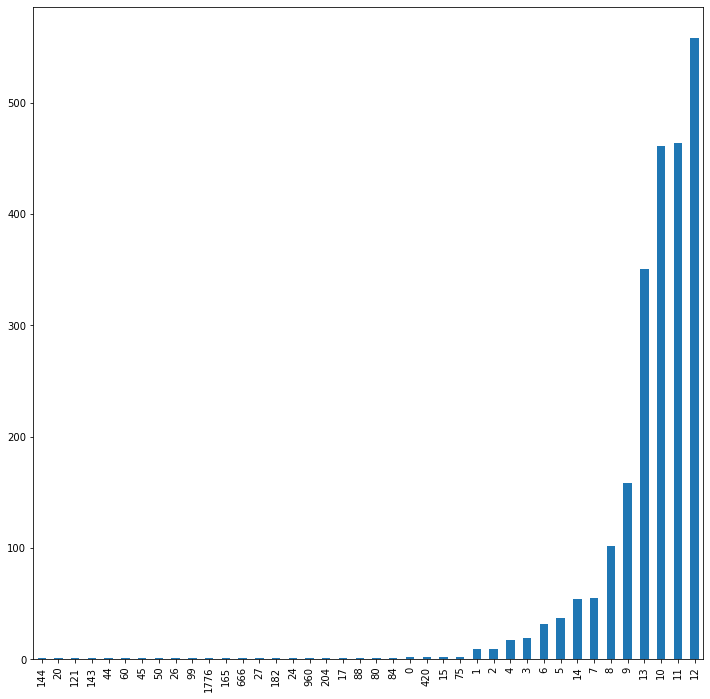

In [12]:
df_archive.rating_numerator.value_counts().sort_values(ascending=True).plot(kind='bar', figsize=(12,12));

In [13]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [14]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues

1. `df_archive` dataset has NaN values in columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` and `expanded_urls`.

2. `df_archive` dataset has the article 'a' as dog names for some rows that starts with 'Here is a' clause. 

3. In `df_archive` dataset, `timestamp` and `retweeted_status_timestamp` have incorrect object types. They should have datetime instead.

4. `df_archive` dataset doesn't have any missing values for dog names and types. However, there are None entries in many rows. There is misrepresentation of NaN values.

5. In `df_archive`, the `source` column has 4 values which basically stands for the source of the tweet, from which means it was created. The values are confusing HTML elements which includes the hyperlinks, not only the element content.

6. In `df_image` dataset, the class labels has a non standard presentation. Some have upper case first letters, others have lowercase letters for the entire name. Furthermore, `German_short-haired-pointer` has - and _ intertwined instead of whitespace.

7. In `df_image`, column names are not very descriptive, unlike in other datasets. Confusion between the class name, the class probability and dog class. Also, other variable names are not clear.

8. In `df_tweet` dataset, `retweet_count` and `favorite_count` include tweets that are in reply to other tweets. In addition, it also includes the tweets that retweet other tweets. Inclusion of these tweets creates bias in the former aggregates, because the computed statistics includes retweet and replying tweets within the original tweets' statistics.

### Tidiness issues
1. In `df_archive` table, we should have one column `age` and 3 values `doggo`, `pupper` and `puppo` in it, instead of having three different columns. All these three columns represent one single variable.

2. All three datasets form one observational unit, so they should all be merged to form a tidy dataset.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [17]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy(deep=True)
df_image_clean = df_image.copy(deep=True)
df_tweet_clean = df_tweet.copy(deep=True)

### Issue #1:

`df_archive` dataset has NaN values in columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` and `expanded_urls`.

#### Define:

It is impossible to impute the missing values in case of this dataset, as the data just doesn't have the values for the missing cells. However, there are a few things to consider about the missing values, though.

- There are a few rows without a value for the `expanded_urls`. Probably, these are the tweets that were tweeted originally; but, deleted afterwards. Therefore, I will exclude these tweets from the clean data.
- As I have mentioned in a different problem, the tweets that reply or retweet other tweets put bias in our statistical computations of the favorite and retweet counts. Hence, I will only include the rows which have NaN values for the retweet and reply related columns. I will also drop these columns afterwards, as they wouldn't be useful in the analysis.

#### Code

In [18]:
# Exclude NaNs in expanded_urls 
df_archive_clean = df_archive_clean[df_archive_clean.expanded_urls.notna()]
# Consider only the rows which have NaNs for in_reply_to_status_id and retweeted_status_id columns.
df_archive_clean = df_archive_clean[df_archive_clean.in_reply_to_status_id.isna() & df_archive_clean.retweeted_status_id.isna()]
# Drop columns related to in_reply and retweeted
columns_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_archive_clean = df_archive_clean.drop(columns_to_drop, axis=1)

#### Test

In [19]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   int64 
 1   timestamp           2094 non-null   object
 2   source              2094 non-null   object
 3   text                2094 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2094 non-null   int64 
 6   rating_denominator  2094 non-null   int64 
 7   name                2094 non-null   object
 8   doggo               2094 non-null   object
 9   floofer             2094 non-null   object
 10  pupper              2094 non-null   object
 11  puppo               2094 non-null   object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


### Issue #2:

In `df_archive` table, we should have one column `age` and 3 values `doggo`, `pupper` and `puppo` in it, instead of having three different columns. All these three columns represent one single variable.

#### Define

- Use melt method to unpivot the doggo, puppo and pupper columns and select all the rows with age information.
- Select all the rows with no age information
- Concatenate two dataframes and form the final dataframe with a single age column.

#### Code

In [20]:
# Create a first DataFrame with melt to obtain a DataFrame with only age information
tmp1 = df_archive_clean.melt(id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
                                      'floofer', 'rating_numerator', 'rating_denominator', 'name'],
                             value_vars=['doggo', 'puppo', 'pupper'],
                             var_name='age')
tmp1 = tmp1.loc[(tmp1.value == 'doggo') | (tmp1.value == 'puppo') |(tmp1.value == 'pupper')].drop('value', axis=1)
# Create a second DataFrame to include only rows that don't have the age information
tmp2 = df_archive_clean.loc[(df_archive_clean.puppo == 'None') & (df_archive_clean.pupper == 'None') & (df_archive_clean.doggo == 'None')]
# Pick one column to keep the missing values for the age
tmp2 = tmp2.drop(['puppo', 'pupper'], axis=1)
# Rename the picked column for the age
tmp2 = tmp2.rename({'doggo':'age'}, axis=1)
# Adjust column name ordering before concatenation, because melt places the unpivoted column to the end.
tmp2 = tmp2[['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 
             'floofer', 'rating_numerator', 'rating_denominator', 'name',
             'age']]
# Concatenate two DataFrames
df_archive_clean = pd.concat([tmp1, tmp2], axis=0)

#### Test

In [21]:
df_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,floofer,rating_numerator,rating_denominator,name,age
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,None,14,10,Cassie,doggo
39,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,None,12,10,Yogi,doggo
86,872967104147763200,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,None,12,10,None,doggo
94,871515927908634625,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,None,12,10,Napolean,doggo
95,871102520638267392,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,None,14,10,None,doggo
...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,None,5,10,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,None,6,10,a,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,None,9,10,a,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,None,7,10,a,None


In [22]:
df_archive_clean.age.value_counts()

None      1768
pupper     229
doggo       83
puppo       24
Name: age, dtype: int64

### Issue #3:

All three datasets form one observational unit, so they should all be merged to form a tidy dataset.

#### Define

- Create a new DataFrame `clean_merged` by merging all three DataFrames together

#### Code

In [23]:
# Merge df_archive with df_tweet
tmp = df_archive_clean.merge(df_tweet_clean, on='tweet_id', how='inner')
# Merge the former with df_image
df_merged_clean = tmp.merge(df_image_clean, on='tweet_id', how='inner')

#### Test

In [24]:
df_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1979
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1980 non-null   int64  
 1   timestamp           1980 non-null   object 
 2   source              1980 non-null   object 
 3   text                1980 non-null   object 
 4   expanded_urls       1980 non-null   object 
 5   floofer             1980 non-null   object 
 6   rating_numerator    1980 non-null   int64  
 7   rating_denominator  1980 non-null   int64  
 8   name                1980 non-null   object 
 9   age                 1980 non-null   object 
 10  retweet_count       1980 non-null   int64  
 11  favorite_count      1980 non-null   int64  
 12  jpg_url             1980 non-null   object 
 13  img_num             1980 non-null   int64  
 14  p1                  1980 non-null   object 
 15  p1_conf             1980 non-null   float64
 16  p1_dog

### Issue #4

`df_archive` dataset has the article 'a' as dog names for some rows that starts with 'Here is a' clause.

#### Define

- Replace the 'a' values in the column `name` with 'None'. Although the latter is not the appropriate way to represent the missing values, I will it later in a different data quality task.
- Also, do the replacement in `df_merged_clean` DataFrame since we tidied the data.

#### Code

In [25]:
df_merged_clean.name = df_merged_clean.name.replace('a', 'None')

#### Test

In [26]:
df_merged_clean.name.value_counts()

None          583
Charlie        11
Oliver         10
Lucy           10
Cooper         10
             ... 
Robin           1
Monster         1
BeBe            1
Remus           1
Christoper      1
Name: name, Length: 934, dtype: int64

### Issue #5

In `df_archive` dataset, `timestamp` and `retweeted_status_timestamp` have incorrect object types. They should have datetime instead.

#### Define

- Change the data type of `timestamp` column in `df_merged_clean` dataset. 
- The other column is already removed, will be ignored.

#### Code

In [27]:
df_merged_clean.timestamp = pd.to_datetime(df_merged_clean.timestamp)

#### Test

In [28]:
df_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1979
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1980 non-null   int64              
 1   timestamp           1980 non-null   datetime64[ns, UTC]
 2   source              1980 non-null   object             
 3   text                1980 non-null   object             
 4   expanded_urls       1980 non-null   object             
 5   floofer             1980 non-null   object             
 6   rating_numerator    1980 non-null   int64              
 7   rating_denominator  1980 non-null   int64              
 8   name                1980 non-null   object             
 9   age                 1980 non-null   object             
 10  retweet_count       1980 non-null   int64              
 11  favorite_count      1980 non-null   int64              
 12  jpg_url             1980 non-null 

### Issue #6

`df_archive` dataset doesn't have any missing values for dog names and types. However, there are None entries in many rows. There is misrepresentation of NaN values.

#### Define

- Replace the 'None' values with NaN values of the NumPy library in the `df_merged_clean` DataFrame. Due to tidying, the relevant columns are now in the former DataFrame.

#### Code

In [29]:
df_merged_clean.name = df_merged_clean.name.replace('None', np.nan)
df_merged_clean.age = df_merged_clean.age.replace('None', np.nan)
df_merged_clean.floofer = df_merged_clean.floofer.replace('None', np.nan)

#### Test

In [31]:
df_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1979
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1980 non-null   int64              
 1   timestamp           1980 non-null   datetime64[ns, UTC]
 2   source              1980 non-null   object             
 3   text                1980 non-null   object             
 4   expanded_urls       1980 non-null   object             
 5   floofer             8 non-null      object             
 6   rating_numerator    1980 non-null   int64              
 7   rating_denominator  1980 non-null   int64              
 8   name                1397 non-null   object             
 9   age                 305 non-null    object             
 10  retweet_count       1980 non-null   int64              
 11  favorite_count      1980 non-null   int64              
 12  jpg_url             1980 non-null 

### Issue #7:

In `df_archive`, the `source` column has 4 values which basically stands for the source of the tweet, from which means it was created. The values are confusing HTML elements which includes the hyperlinks, not only the element content.

#### Define

- Since each source entry is an HTML 'a' tag, I will make BeautifulSoup for each entry and extract the tag content string. This will give me the right categorical name.

#### Code

In [32]:
from bs4 import BeautifulSoup

df_merged_clean.source = df_merged_clean.source.apply(lambda tag: BeautifulSoup(tag).find('a').contents[0])

#### Test

In [33]:
df_merged_clean.source.value_counts()

Twitter for iPhone    1941
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### Issue #8:

In `df_image` dataset, the class labels has a non standard presentation. Some have upper case first letters, others have lowercase letters for the entire name. Furthermore, `German_short-haired-pointer` has - and _ intertwined instead of whitespace.

#### Define

- Make all the words in the class label lowercase
- Replace '-' with '\_' in all the words.

#### Code

In [34]:
clean_class_label = lambda x: x.lower().replace('-', '_')
df_merged_clean.p1 = df_merged_clean.p1.apply(lambda x: clean_class_label(x))
df_merged_clean.p2 = df_merged_clean.p2.apply(lambda x: clean_class_label(x))
df_merged_clean.p3 = df_merged_clean.p3.apply(lambda x: clean_class_label(x))

#### Test

In [35]:
df_merged_clean

,tweet_id,timestamp,source,text,expanded_urls,floofer,rating_numerator,rating_denominator,name,age,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,NaN,14,10,Cassie,doggo,...,1,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True
1,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,NaN,12,10,Yogi,doggo,...,1,german_shepherd,0.707046,True,malinois,0.199396,True,norwegian_elkhound,0.049148,True
2,872967104147763200,2017-06-09 00:02:31+00:00,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,NaN,12,10,NaN,doggo,...,2,labrador_retriever,0.476913,True,chesapeake_bay_retriever,0.174145,True,german_short_haired_pointer,0.092861,True
3,871515927908634625,2017-06-04 23:56:03+00:00,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,NaN,12,10,Napolean,doggo,...,2,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False
4,869596645499047938,2017-05-30 16:49:31+00:00,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,NaN,12,10,Scout,doggo,...,1,chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,NaN,5,10,NaN,NaN,...,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
1976,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,NaN,6,10,NaN,NaN,...,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1977,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,NaN,9,10,NaN,NaN,...,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1978,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,NaN,7,10,NaN,NaN,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True


### Issue #9:

In `df_image`, column names are not very descriptive, unlike in other datasets. Confusion between the class name, the class probability and dog class. Also, other variable names are not clear.

#### Define

- Change `p1`, `p2`, `p3` column names to `class1`, `class2`, `class3`; respectively.
- Change `img_num` to `image_number`.
- Change `p1_conf`, `p2_conf`, `p3_conf` to `class1_score`, `class2_score`, `class3_score`; respectively.
- Change `p1_dog`, `p2_dog`, `p3_dog` to `is_class1_dog`, `is_class2_dog`, `is_class3_dog`; respectively.

#### Code

In [36]:
rename_dict = {'p1': 'class1',
               'p2': 'class2',
               'p3': 'class3',
               'img_num': 'image_number',
               'p1_conf': 'class1_score',
               'p2_conf': 'class2_score',
               'p3_conf': 'class3_score',
               'p1_dog': 'is_class1_dog',
               'p2_dog': 'is_class2_dog',
               'p3_dog': 'is_class3_dog'}

df_merged_clean = df_merged_clean.rename(rename_dict, axis=1)

#### Test

In [37]:
df_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1979
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1980 non-null   int64              
 1   timestamp           1980 non-null   datetime64[ns, UTC]
 2   source              1980 non-null   object             
 3   text                1980 non-null   object             
 4   expanded_urls       1980 non-null   object             
 5   floofer             8 non-null      object             
 6   rating_numerator    1980 non-null   int64              
 7   rating_denominator  1980 non-null   int64              
 8   name                1397 non-null   object             
 9   age                 305 non-null    object             
 10  retweet_count       1980 non-null   int64              
 11  favorite_count      1980 non-null   int64              
 12  jpg_url             1980 non-null 

### Issue #10:

In `df_tweet` dataset, `retweet_count` and `favorite_count` include tweets that are in reply to other tweets. In addition, it also includes the tweets that retweet other tweets. Inclusion of these tweets creates bias in the former aggregates, because the computed statistics includes retweet and replying tweets within the original tweets' statistics.

#### Define

`df_archive` DataFrame doesn't include any retweets or replying tweets after the cleaning step in an earlier task. Hence, doing an inner join between `df_tweet` and `df_archive` would eliminate retweet and favorite statistics for those tweets.

- We should note that we have already done a join on the former DataFrames for tidying the dataset, so `df_merged_clean` should not include any tweets for replying and retweets.

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [38]:
df_merged_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_archive_master = pd.read_csv('twitter_archive_master.csv')

In [40]:
df_archive_master.groupby(by=['age'])[['retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator']].agg(['mean', 'median'], axis=1)

retweet_count         favorite_count          rating_numerator         \
                mean  median           mean   median             mean median   
age                                                                            
doggo    6941.452055  3128.0   19044.164384  12157.0        11.794521   12.0   
pupper   2459.622010  1258.0    7479.019139   3397.0        10.727273   11.0   
puppo    7027.086957  3220.0   22723.913043  15359.0        12.043478   12.0   

       rating_denominator         
                     mean median  
age                               
doggo                10.0   10.0  
pupper               10.0   10.0  
puppo                10.0   10.0

In [41]:
df_archive_master.groupby(by='source')[['class1_score', 'is_class1_dog', 'class2_score', 'is_class2_dog', 'class3_score', 'is_class3_dog']].mean()

,class1_score,is_class1_dog,class2_score,is_class2_dog,class3_score,is_class3_dog
source,,,,,,
TweetDeck,0.532781,0.636364,0.115380,0.636364,0.060292,0.636364
Twitter Web Client,0.562730,0.678571,0.133679,0.678571,0.068533,0.571429
Twitter for iPhone,0.596178,0.744462,0.134518,0.752705,0.059938,0.728490


In [43]:
df_archive_master.groupby(by='source').size()

source
TweetDeck               11
Twitter Web Client      28
Twitter for iPhone    1941
dtype: int64

In [45]:
class1_misclassification_flag = (df_archive_master.source == 'Twitter for iPhone') & (df_archive_master.is_class1_dog == False)
class1_dist = df_archive_master.loc[class1_misclassification_flag].groupby(by='class1').size().sort_values(ascending=False)
class1_dist[class1_dist >= 5]

class1
seat_belt        21
teddy            17
web_site         14
tennis_ball       8
dingo             8
doormat           7
siamese_cat       7
swing             7
llama             6
car_mirror        6
tub               6
bath_towel        6
porcupine         6
hamster           6
home_theater      5
ox                5
ice_bear          5
minivan           5
shopping_cart     5
dtype: int64

### Insights:
1. The distribution of retweet and favorite counts are skewed for all age groups. The distribution of the ratings on the other hand are not skewed for all age groups. Looks like middle aged dogs are most popular. They have the highest rating on average, retweeted by most people, and their pictures are liked most. Based on the same metrics, young dogs are the least favorite, which is interesting in my point of view. Most people would expect the opposite. **In terms of the data cleaning**, I used the tidied dataset with respect to age. I also removed the retweets and replies in the computed statistics so that the computed mean and median values are not biased by the statistics of the original tweets and the replied/retweeted tweets.  

2. Across all tweets from different sources, our image classifier is pretty confident with respect to the first predicted class. However, there are pretty a lot of prediction in all three top classes where the predictions are not actually dogs. This requires additional attention as it would be interesting to see which object the dogs are confused with for most classification errors. **In terms of data cleaning**, I used the renamed columns in related datasets so that the insights derived are much easier to follow. Again, retweets and replies are ignored. Last, source tags are much more readable and interpretable due to cleaning.

3. If we focus particularly the tweets sourced from iPhone (as this is the most popular source of tweets), the misclassified images can be analyzed for the top 1 most confident class. The top 3 most confused classes are seat\_belt, teddy and web\_site. This is something to tackle further by analyzing the actual images of dogs who are labeled like this. It is interesting to observe this. **In term of data cleaning**, the same parts are used as in the former insight, as this is the extension of the second insight.

### Visualization

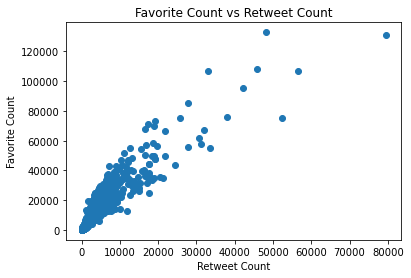

In [46]:
plt.scatter(x=df_archive_master.retweet_count, y=df_archive_master.favorite_count)
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('Favorite Count vs Retweet Count');

Looks like there is a positive linear correlation between the retweet and favorite counts. This suggests that when people retweet a dog picture, they also actually like the picture itself. We can also predict one variable from the other using linear regression. **In terms of data cleaning**, I still exclude the replies and retweets.